In [1]:
conda install pytorch::pytorch torchvision torchaudio -c pytorch

Channels:
 - pytorch
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
import torch
import os
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# transforming Python images from CIFAR10 to normalized tensors to turn pics into range [-1, 1]??
# transforms takes in mean and sd and somehow this makes [-1, 1]???
# Todo: understand
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#normalized value = (x - mean) /std => [-1, 1]

# size of each batch, there are len(CIFAR10) / batch_size number of batches
batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#returns a DataLoader which can be iterated over with for each loop
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


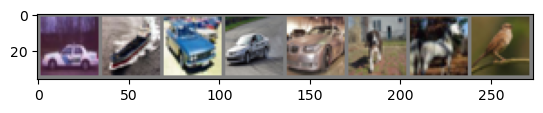

car   ship  car   car   car   dog   horse bird 


In [4]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [13]:



class Net(nn.Module):
    def __init__(self):
        #IMPORTANT number of channel is not size of image
        super().__init__()
        # in_channel, out_channel, kernel_size (size of the filter) 5x5 filter
        # taking in 3 channels and having 6 filters
        self.conv1 = nn.Conv2d(3, 6, 5)
        # kernel_size, stride
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # flatten the convolutional layer into a string
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
# net = None

In [14]:


criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [15]:

# an epoch is looping through the entire dataset
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(inputs)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.754
[1,  4000] loss: 1.496
[1,  6000] loss: 1.401
[2,  2000] loss: 1.291
[2,  4000] loss: 1.253
[2,  6000] loss: 1.208
[3,  2000] loss: 1.136
[3,  4000] loss: 1.133
[3,  6000] loss: 1.114
[4,  2000] loss: 1.051
[4,  4000] loss: 1.050
[4,  6000] loss: 1.055
[5,  2000] loss: 0.986
[5,  4000] loss: 1.001
[5,  6000] loss: 0.993
Finished Training


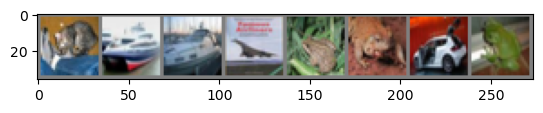

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 
Predicted:  cat   car   ship  plane frog  frog  cat   frog 


In [16]:

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#in eval mode and not training mode
model = net.eval()
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

# for img in images:
#     output = model(img)
#     print(output)
    
    # print(img)



In [17]:
#how effective our model is 
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

for data in testloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = model(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %
